## Streaming Wars - A Streaming Platform Analysis

#### Dependencies and DataFrame Initializations

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from numpy import disp
from matplotlib import style

In [2]:
# get movie data file and make dataframe
movie_data = pd.read_csv('movieData.csv')

# drop rows with missing data in either genre or country
movie_data=movie_data.dropna(subset = ['Genre', 'Country'])

# display dataframe
movie_data


,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Runtime (min),Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,NaN,"Biography, Crime, Drama",94.0,7.8,95%,United States,"English, Italian, Latin, Spanish, German",209 min
1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,NaN,"Action, Biography, Drama",NaN,8.3,88%,"India, United States","Hindi, English",161 min
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,NaN,"Documentary, Biography",72.0,8.9,96%,United Kingdom,English,83 min
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,NaN,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom","Hindi, English",224 min
4,4,5,Roma,2018,18+,1,0,0,0,0,R,NaN,Drama,96.0,7.7,96%,"Mexico, United States","Spanish, Mixtec, English, Japanese, German, Fr...",135 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9342,9342,9343,Walt & El Grupo,2008,7+,0,0,0,1,0,PG,NaN,"Biography, Drama",NaN,5.9,17%,United States,"English, Spanish",107 min
9352,9352,9353,Own the Room,2021,7+,0,0,0,1,0,TV-PG,NaN,Documentary,68.0,6.5,100%,United States,English,91 min
9366,9366,9367,Sacred Planet,2004,all,0,0,0,1,0,G,NaN,"Documentary, Short",53.0,6.0,58%,"Canada, Malaysia, United States",English,40 min
9370,9370,9371,Unidentified Flying Oddball,1979,all,0,0,0,1,0,G,NaN,"Adventure, Comedy, Family",66.0,5.1,66/100,United States,English,93 min


In [3]:
# convert Runtime from string to numeric
movie_data['Runtime'] = movie_data['Runtime'].str.replace("min", "")
movie_data = movie_data.drop("Runtime (min)", axis = 1)
movie_data["Runtime"] = movie_data['Runtime'].astype(float)

# convert Rotten Tomatoes from string to numeric
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].str.rstrip("%")
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].str.replace('/100',"")
movie_data['Rotten Tomatoes'] = movie_data['Rotten Tomatoes'].astype(float)

# multiply imbd score by 10 to place on same scale as other scores
movie_data['Imdb'] = movie_data['Imdb'] * 10
movie_data.head()

,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0
1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,89.0,96.0,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,81.0,95.0,"India, United States, United Kingdom","Hindi, English",224.0
4,4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,77.0,96.0,"Mexico, United States","Spanish, Mixtec, English, Japanese, German, Fr...",135.0


In [4]:
# dataframe to split and explode by genre
df_to_split = movie_data.reset_index()
df_to_split_gen = df_to_split
df_to_split_gen['Genre'] = df_to_split_gen['Genre'].astype(str)
df_to_split_gen['Genre Type'] = df_to_split_gen['Genre'].str.strip(' ')
df_to_split_gen['Genre Type'] = df_to_split_gen['Genre'].str.split(', ')
df_to_split_gen = df_to_split_gen.explode('Genre Type')
df_to_split_gen.to_csv('df_to_split_gen.csv', index=False)
df_to_split_gen.head()

,index,Unnamed: 0,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime,Genre Type
0,0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,Biography
0,0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,Crime
0,0,0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,Drama
1,1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,Action
1,1,1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,Biography


In [5]:
# dataframe to split and explode by country
df_to_split_cty = movie_data.reset_index()
df_to_split_cty['Country'] = df_to_split_cty['Country'].astype(str)
df_to_split_cty['Countries'] = df_to_split_cty['Country'].str.strip(' ')
df_to_split_cty['Countries'] = df_to_split_cty['Country'].str.split(', ')
df_to_split_cty = df_to_split_cty.explode('Countries')
# replace instances of "USA" to "United States"
df_to_split_cty.loc[df_to_split_cty['Countries'] == 'USA', 'Countries'] = 'United States'
df_to_split_cty = df_to_split_cty.set_index('ID')
df_to_split_cty.to_csv('df_to_split_cty.csv', index=False)
df_to_split_cty.head()

,index,Unnamed: 0,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Language,Runtime,Countries
ID,,,,,,,,,,,,,,,,,,,
1,0,0,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,78.0,95.0,United States,"English, Italian, Latin, Spanish, German",209.0,United States
2,1,1,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,India
2,1,1,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,83.0,88.0,"India, United States","Hindi, English",161.0,United States
3,2,2,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,89.0,96.0,United Kingdom,English,83.0,United Kingdom
4,3,3,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,81.0,95.0,"India, United States, United Kingdom","Hindi, English",224.0,India


#### Which streaming platform provides the most diverse selection of genres?
* Number of movies per platform
* Distribution of genres
* Distribution of release year (by decade) per platform

##### Number of movies per platform

In [6]:
#find the number of movies in Netflix
netflix_count=len(df_to_split_gen.loc[df_to_split_gen["Netflix"]==1,:]["Title"].unique())

#find the number of movies in Hulu
hulu_count=len(df_to_split_gen.loc[df_to_split_gen["Hulu"]==1,:]["Title"].unique())

#find the number of movies Prime Video
prime_count=len(df_to_split_gen.loc[df_to_split_gen["Prime Video"]==1,:]["Title"].unique())

#find the number of movies Disney+
disney_count=len(df_to_split_gen.loc[df_to_split_gen["Disney+"]==1,:]["Title"].unique())

total_shows = len(df_to_split_gen["Title"].unique())

print(f'Netflix: {netflix_count} \nHulu: {hulu_count} \nHulu: {prime_count} \nDisney+: {disney_count}')
print(f'Total Movies: {total_shows}')


Netflix: 1593 
Hulu: 817 
Hulu: 1703 
Disney+: 440
Total Movies: 4362


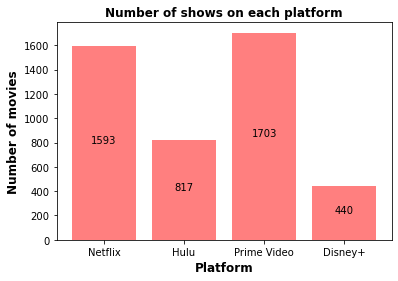

In [7]:
# Bar chart showing the number of movies on each platform
x_axis = ["Netflix","Hulu","Prime Video","Disney+"]
y_axis = [netflix_count,hulu_count,prime_count,disney_count]
plot=plt.bar(x_axis,y_axis,color="red",alpha=0.5,align="center")
plt.title('Number of shows on each platform', fontweight='bold', fontsize=12)
plt.xlabel('Platform', fontweight='bold', fontsize=12)
plt.ylabel('Number of movies', fontweight='bold', fontsize=12)
i = 0
for p in plot:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*0.5,
             y_axis[i],
             ha='center',
             weight='normal')
    i+=1
plt.savefig("images/movies_per_platform.png", bbox_inches="tight")
plt.show()

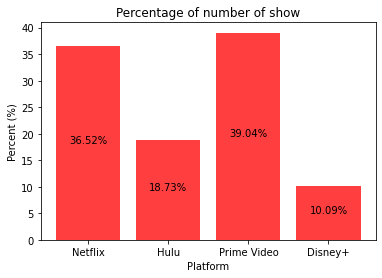

In [8]:
#Calculate the percentage of shows a platform has from the total number in OMDB list
Netflix_shows_percent = (netflix_count / total_shows) *100
Hulu_shows_percent = (hulu_count / total_shows) *100
Prime_shows_percent = (prime_count / total_shows) *100
Disney_shows_percent = (disney_count / total_shows) *100

#Bar chart for the percentages
x_axis=["Netflix","Hulu","Prime Video","Disney+"]
y_axis=[Netflix_shows_percent,Hulu_shows_percent,Prime_shows_percent,Disney_shows_percent]
plt.bar(x_axis,y_axis,color="red",alpha=0.5,align="center")
chart=plt.bar(x_axis,y_axis,color="red",alpha=0.5,align="center")
plt.title("Percentage of number of show")
plt.xlabel("Platform")
plt.ylabel("Percent (%)")
# plt.ylim(0,100)

i = 0
for p in chart:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*0.5,
             f"{round(y_axis[i],2)}%",
             ha='center',
             weight='normal')
    i+=1
plt.savefig("images/percent_movies_per_platform.png", bbox_inches="tight")
plt.show()



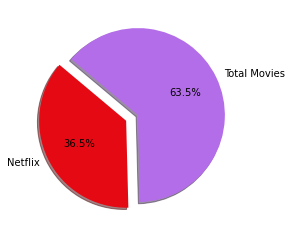

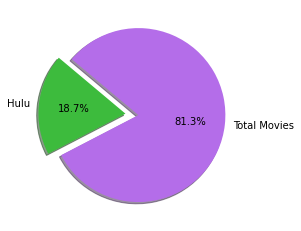

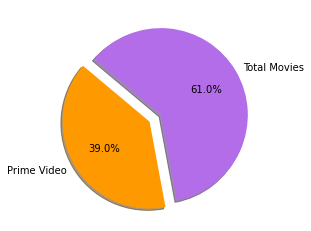

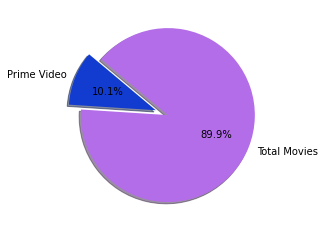

In [9]:
#show Netflix share of OMDB list
sizes=[netflix_count,total_shows-netflix_count]
labels=["Netflix","Total Movies"]
colors=['#e50914','#b46de9']
explode=(0.15,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/netflix_share.png", bbox_inches="tight")
plt.show()

#show Hulu share of OMDB list
sizes=[hulu_count,total_shows-hulu_count]
labels=["Hulu","Total Movies"]
colors=['#3dbb3d','#b46de9']
explode=(0.15,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/hulu_share.png", bbox_inches="tight")
plt.show()

#show Prime Video share of OMDB list
sizes=[prime_count,total_shows-prime_count]
labels=["Prime Video","Total Movies"]
colors=['#ff9900','#b46de9']
explode=(0.15,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/prime_video_share.png", bbox_inches="tight")
plt.show()

#show Disney+ share of OMDB list
sizes=[disney_count,total_shows-disney_count]
labels=["Prime Video","Total Movies"]
colors=['#113ccf','#b46de9']
explode=(0.15,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/disney_share.png", bbox_inches="tight")
plt.show()

##### Distribution of genres

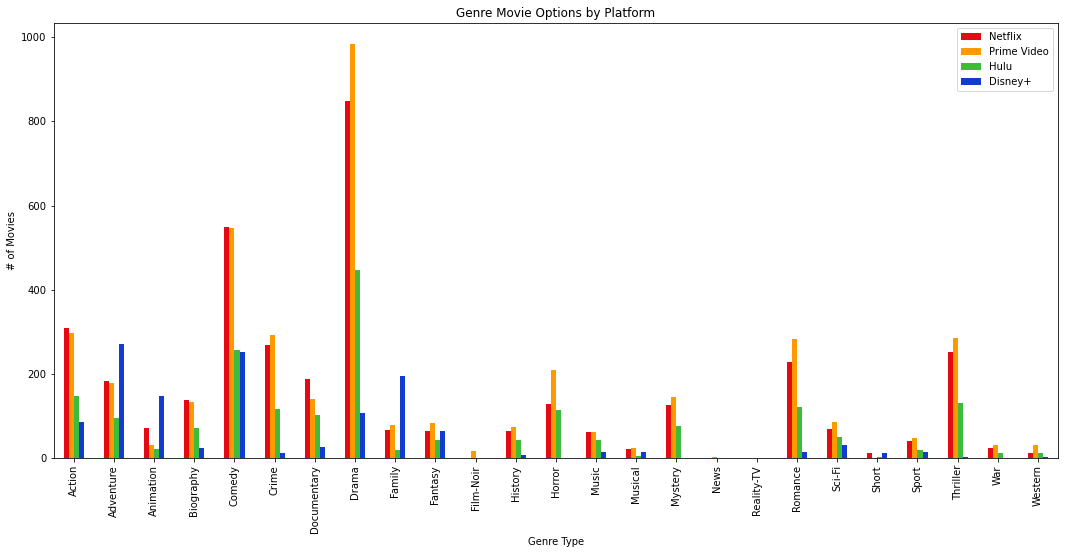

In [10]:
# group by each Genre Column, and tally the amount of each genre per streaming service by summing the values in each streaming service column
genre_count = df_to_split_gen.groupby(['Genre Type'],as_index=True).sum()[['Netflix', 'Prime Video', 'Hulu', 'Disney+']]
genre_count.plot.bar(figsize=(18,8), rot=90, color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])
plt.ylabel('# of Movies')
plt.title('Genre Movie Options by Platform')
plt.savefig("images/genre_options_per_platform.png", bbox_inches="tight")

##### Distribution of release year (by decade) per platform

In [11]:
# set bins and bin names for distribution by decade of each streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]

# place 'Year" column into decade bins
movie_data['Decade']=pd.cut(movie_data['Year'],size_bins, labels=group_names, right=False)

#movie_count_decade=movie_datadf.groupby('Decade').agg({'Netflix':['sum'],'Prime Video':['sum'],'Hulu':['sum'],'Disney+':['sum']})
# get decade counts
movie_count_decade = movie_data.groupby(["Decade"]).sum()[["Netflix", "Prime Video", "Hulu", "Disney+"]]
movie_count_decade

,Netflix,Prime Video,Hulu,Disney+
Decade,,,,
Before 1980,12,213,23,64
1980-1989,16,86,26,22
1990-1999,52,142,51,79
2000-2009,150,329,112,121
2010-2022,1363,933,605,154


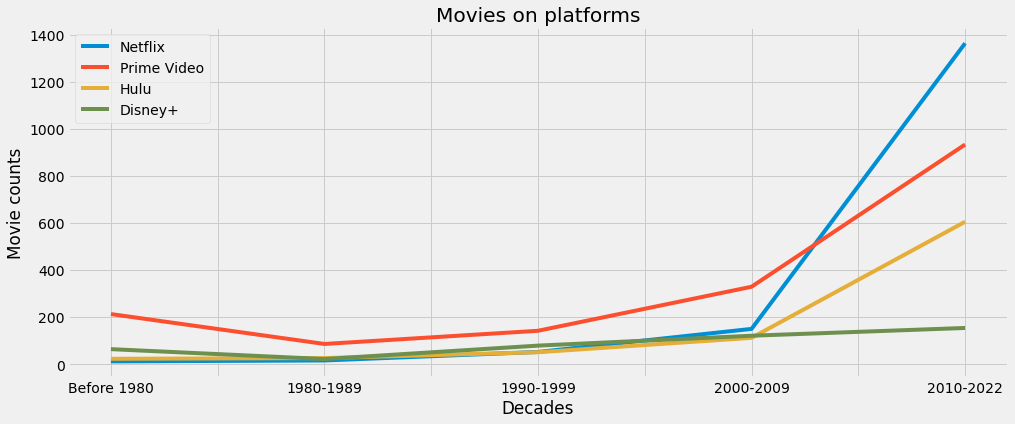

In [12]:
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# set axis
ax=movie_count_decade.plot(figsize=(15,6))

# Add a title
ax.set_title("Movies on platforms")

#  Add a x- and y-axis label.
ax.set_xlabel("Decades")
ax.set_ylabel("Movie counts")

plt.savefig("images/movies_by_decade.png", bbox_inches="tight")
plt.show()

#### Which platform has the most movies and in how many countries are they accessible?
* Distribution of countries for each platform
* Distribution of ratings by country

##### Distribution of countries for each platform

In [13]:
# # to get top 20th value of platform totals column (1 less of 20 since start is 0)
n = 20

# for getting names of countires in top 20 and making rest 'not top 20'
country_top = df_to_split_cty.groupby(['Countries']).sum()[['Netflix','Prime Video','Hulu','Disney+']]
sum_cols = country_top['Netflix'] + country_top['Prime Video'] + country_top['Hulu'] + country_top['Disney+']

# create new column for total platforms
country_top['Platform Totals'] = sum_cols

# set 20th largest variable to check top 20 countries
top20_limit = country_top['Platform Totals'].nlargest(n)
top20_limit = top20_limit.min()
top20_max = country_top['Platform Totals'].max()

# sort ascending order for high-to-low hbar chart display
country_top = country_top.sort_values(['Platform Totals'], ascending=True).reset_index()

# create 'Top 20' column to id if country is in top 20 (keep country name) or if not in top 20
country_top['Top 20'] = 0
country_top['Top 20'].mask(country_top['Platform Totals'] >= top20_limit, country_top['Countries'], inplace=True)
country_top['Top 20'].mask(country_top['Platform Totals'] < top20_limit, 'Not Top 20', inplace=True)
country_top.reset_index()
country_top.head()

,Countries,Netflix,Prime Video,Hulu,Disney+,Platform Totals,Top 20
0,Zimbabwe,1,0,0,0,1,Not Top 20
1,Kazakhstan,0,0,0,1,1,Not Top 20
2,Malawi,1,0,0,0,1,Not Top 20
3,Yugoslavia,0,1,0,0,1,Not Top 20
4,Ghana,1,0,0,0,1,Not Top 20


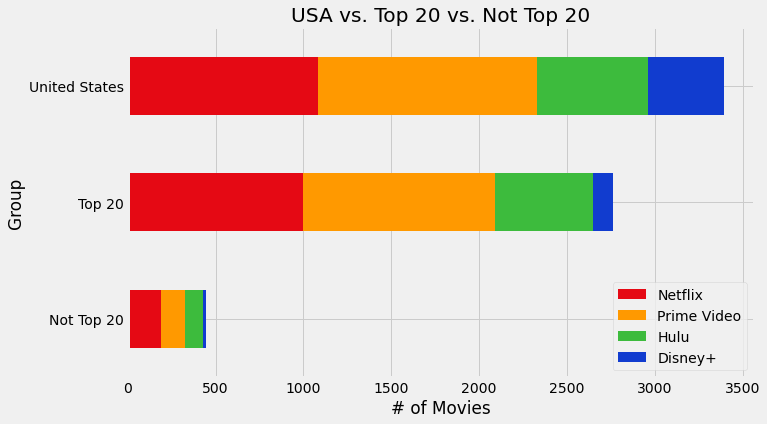

In [14]:
# for getting USA, rest of top 20 and not top 20 using previous code block using copied dataframe
top_comp = df_to_split_cty.groupby(['Countries']).sum()[['Netflix','Prime Video','Hulu','Disney+']]
sum_cols = top_comp['Netflix'] + top_comp['Prime Video'] + top_comp['Hulu'] + top_comp['Disney+']

# create new column for total platforms
top_comp['Platform Totals'] = sum_cols

# set 20th largest variable to check top 20 countries
top20_limit = top_comp['Platform Totals'].nlargest(n)
top20_limit = top20_limit.min()
top20_max = top_comp['Platform Totals'].max()
# sort ascending order for high-to-low hbar chart display
top_comp = top_comp.sort_values(['Platform Totals'], ascending=True).reset_index()

# create 'Top 20' column to id if country is in top 20 (keep country name) or if not in top 20 or 'United States' since has the most
top_comp['Top 20'] = 0
top_comp['Top 20'].mask(top_comp['Platform Totals'] >= top20_limit, 'Top 20', inplace=True)
top_comp['Top 20'].mask(top_comp['Platform Totals'] < top20_limit, 'Not Top 20', inplace=True)
top_comp['Top 20'].mask(top_comp['Platform Totals'] == top20_max, 'United States', inplace=True)
top_comp.reset_index()

top_comp = top_comp.groupby(['Top 20']).sum()[['Netflix','Prime Video','Hulu','Disney+', 'Platform Totals']]

top_comp[['Netflix','Prime Video','Hulu','Disney+']].plot.barh(stacked=True, rot=0, figsize=(10,6), color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])
plt.title('USA vs. Top 20 vs. Not Top 20')
plt.ylabel('Group')
plt.xlabel('# of Movies')
plt.savefig("images/countries_stacked.png", bbox_inches="tight")
plt.show()

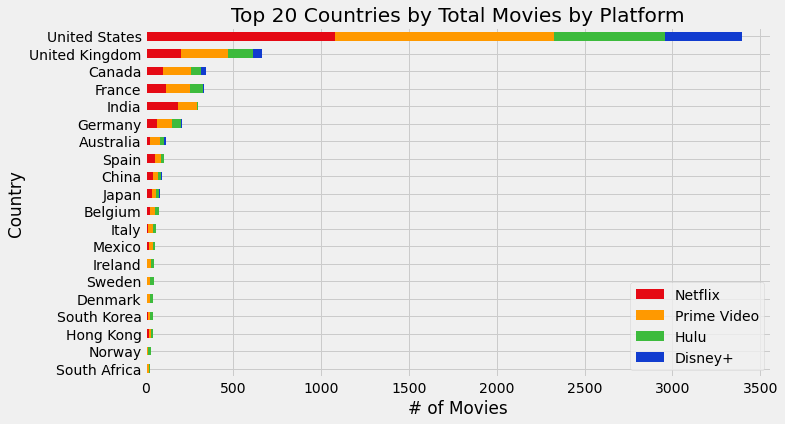

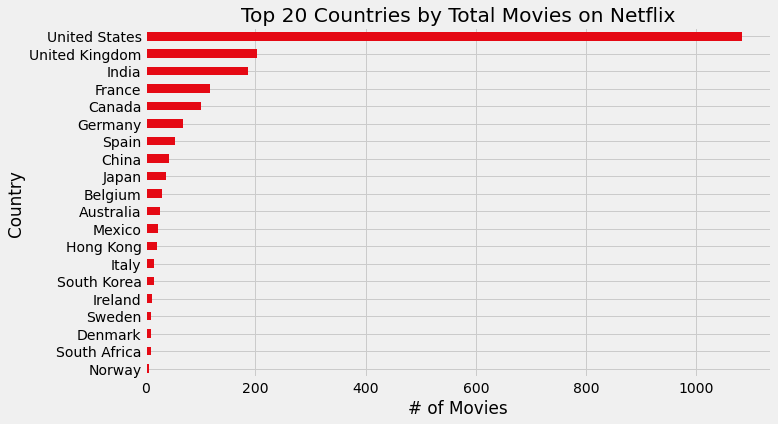

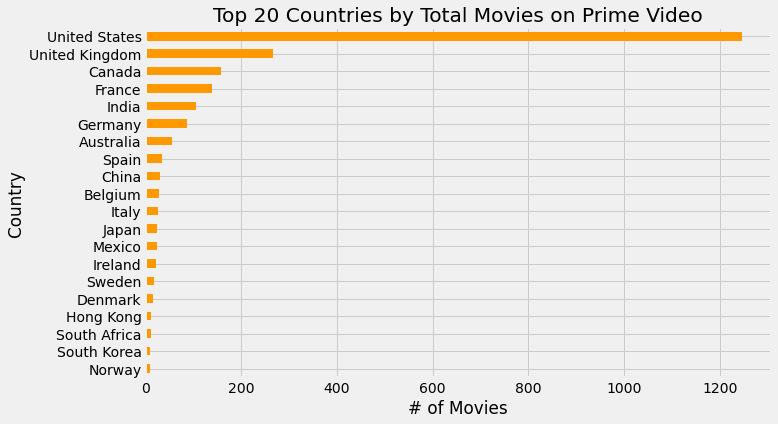

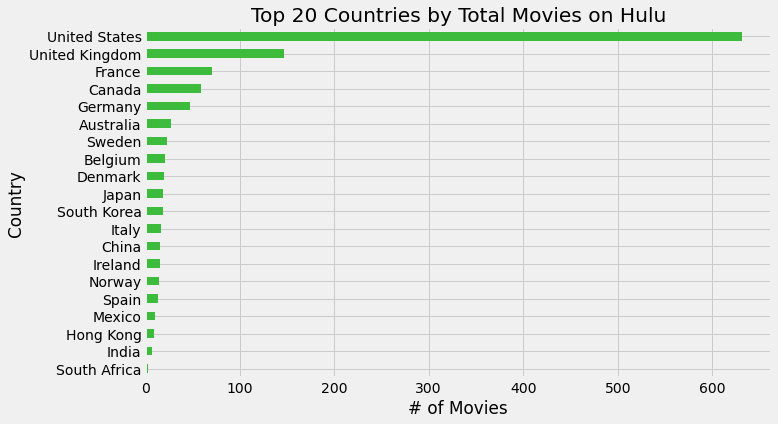

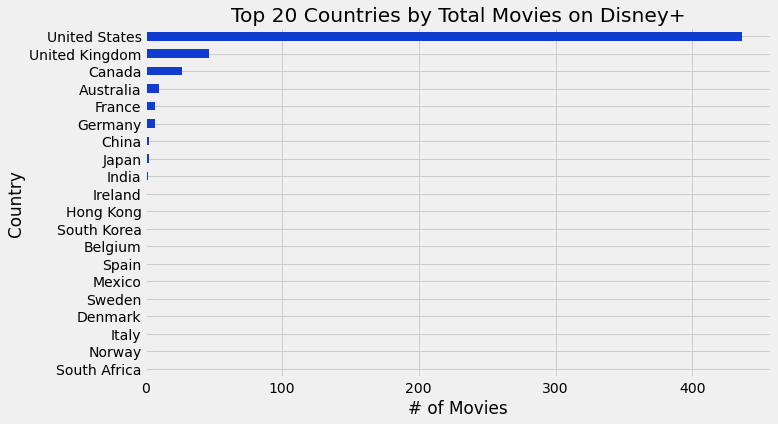

In [15]:
# top 20 countries charts
top20_df = pd.DataFrame({
    'Top Country': country_top['Top 20'],
    #'Top Country': country_count.loc[country_count['Top 20'] != 'Not Top 20'],
    'Platform Totals': country_top['Platform Totals'],
    'Netflix': country_top['Netflix'],
    'Prime Video': country_top['Prime Video'],
    'Hulu': country_top['Hulu'],
    'Disney+': country_top['Disney+']
})

# platform totals
top20_bar = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
top20_bar = top20_bar.set_index('Top Country')
top20_bar[['Netflix','Prime Video','Hulu','Disney+']].plot.barh(stacked=True, rot=0, figsize=(10,6), color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])
plt.title('Top 20 Countries by Total Movies by Platform')
plt.ylabel('Country')
plt.xlabel('# of Movies')
plt.savefig(f'images/combined_top_20.png', bbox_inches="tight")
plt.show()

platforms = ['Netflix','Prime Video','Hulu','Disney+']
colors = ['#e50914', '#ff9900', '#3dbb3d', '#113ccf']
for i in range(4):
    platform_df = str(platforms[i])
    platform_df = top20_df.loc[top20_df['Top Country'] != 'Not Top 20']
    platform_df = platform_df.sort_values([platforms[i]], ascending=True)
    platform_df = platform_df.set_index('Top Country')
    platform_df[platforms[i]].plot.barh(rot=0, figsize=(10,6), color=colors[i])
    plt.title(f'Top 20 Countries by Total Movies on {platforms[i]}')
    plt.ylabel('Country')
    plt.xlabel('# of Movies')
    plt.savefig(f'images/{platforms[i]}_total_movies.png', bbox_inches="tight")
    plt.show()

##### Distribution of ratings by country

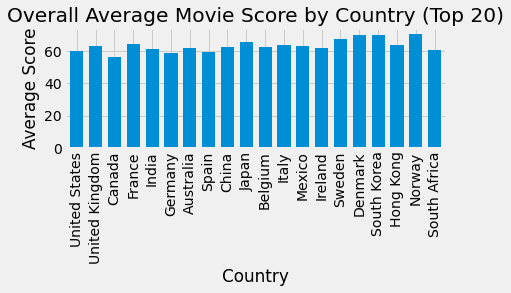

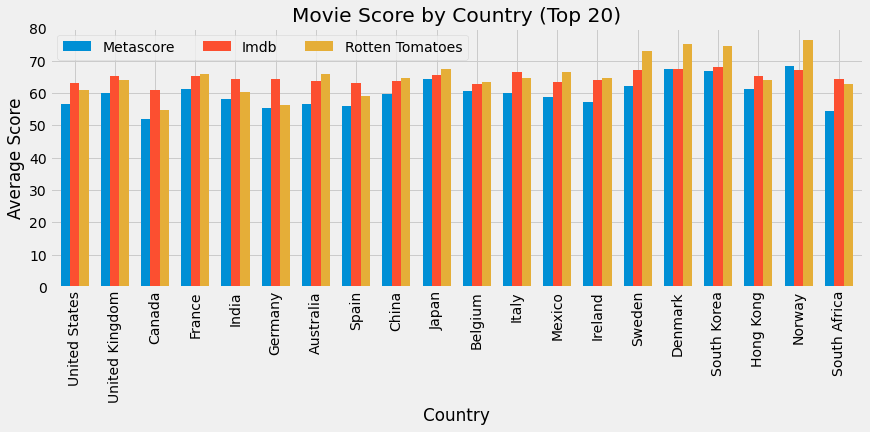

In [16]:
from sqlalchemy import over


country_score = df_to_split_cty.groupby(['Countries']).mean()[['Metascore', 'Imdb', 'Rotten Tomatoes']]
top20_df_score = pd.DataFrame({
    'Countries': country_top['Top 20'],
    #'Top Country': country_count.loc[country_count['Top 20'] != 'Not Top 20'],
    'Platform Totals': country_top['Platform Totals'],
    'Netflix': country_top['Netflix'],
    'Prime Video': country_top['Prime Video'],
    'Hulu': country_top['Hulu'],
    'Disney+': country_top['Disney+']
})

merged_score = pd.merge(top20_df_score, country_score, on=['Countries', 'Countries'])
merged_score['Overall'] = merged_score[['Metascore', 'Imdb', 'Rotten Tomatoes']].mean(axis=1, numeric_only=True, skipna=True).round(3)
merged_score = merged_score.sort_values(['Platform Totals'], ascending=False).reset_index()
ovr_score = merged_score[['Countries', 'Platform Totals', 'Overall']]
ovr_score = ovr_score.set_index('Countries')

ovr_score['Overall'].plot.bar(align="center", width = 0.7)
#display(ovr_score)
plt.rcParams["figure.figsize"] = (12, 6)
plt.tight_layout()
plt.title('Overall Average Movie Score by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.savefig("images/overall_scores_country.png", bbox_inches="tight")
plt.show()

merged_score = merged_score.set_index('Countries')
merged_score[['Metascore', 'Imdb', 'Rotten Tomatoes']].plot.bar(align="center", width = 0.7)
plt.rcParams["figure.figsize"] = (12, 6)
plt.tight_layout()
plt.title('Movie Score by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt. legend(loc='upper left', ncol=6)
plt.savefig("images/average_scores_country.png", bbox_inches="tight")
plt.show()

##### Which streaming platform is the most popular based on movie ratings?
* Average Runtime by Platform
* Runtime by movie rating
* Average Movie Score by Platform

##### Average Runtime by Platform

Index(['Rating', 'Runtime'], dtype='object')


,Runtime Average Netflix,Runtime Average Hulu,Runtime Average Prime Video,Runtime Average Disney+
1,104.84683,102.604651,103.131533,97.675


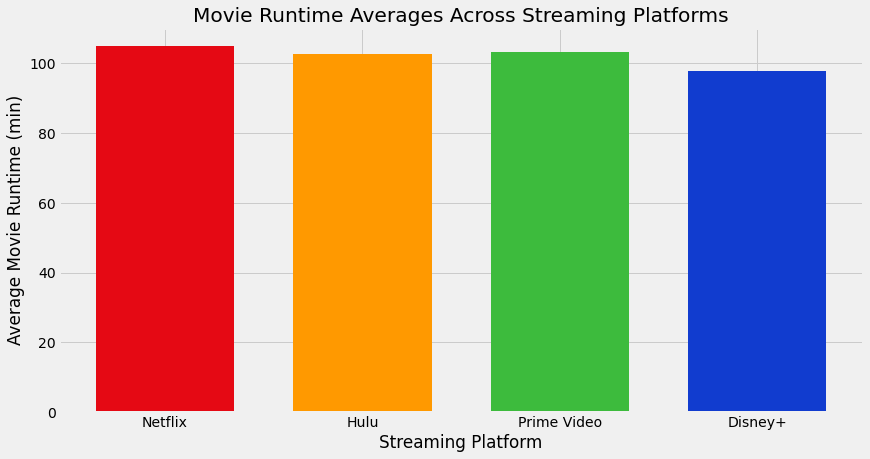

In [17]:
plat_runtime = movie_data.reset_index()
rated_runtime = plat_runtime.groupby(['Rating']).mean()[['Runtime']]
rated_runtime = rated_runtime.reset_index()
print(rated_runtime.columns)

# Netflix
groupbyMeanNetflix = plat_runtime.groupby(["Netflix"])["Runtime"].mean()
summaryNetflixStats = {"Runtime Average Netflix": groupbyMeanNetflix}
summaryNetflixStatsDF = pd.DataFrame(summaryNetflixStats)

# Hulu
groupbyMeanHulu = plat_runtime.groupby(["Hulu"])["Runtime"].mean()
summaryHuluStats = {"Runtime Average Hulu": groupbyMeanHulu}
summaryHuluStatsDF = pd.DataFrame(summaryHuluStats)
summaryHuluStatsDF = summaryHuluStatsDF.drop([0], axis=0)

# Prime Video
groupbyMeanPrime = plat_runtime.groupby(["Prime Video"])["Runtime"].mean()
summaryPrimeStats = {"Runtime Average Prime Video": groupbyMeanPrime}
summaryPrimeStatsDF = pd.DataFrame(summaryPrimeStats)
summaryPrimeStatsDF = summaryPrimeStatsDF.drop([0], axis=0)

# Disney+
groupbyMeanDisney = plat_runtime.groupby(["Disney+"])["Runtime"].mean()
summaryDisneyStats = {"Runtime Average Disney+": groupbyMeanDisney}
summaryDisneyStatsDF = pd.DataFrame(summaryDisneyStats)
summaryDisneyStatsDF = summaryDisneyStatsDF.drop([0], axis=0)

# merge all the summary stats per platform
resetNetflixIndex = summaryNetflixStatsDF.rename(index={'Netflix': ''})
mergeNHDF = summaryNetflixStatsDF.merge(summaryHuluStatsDF, left_on='Netflix', right_index = True)
mergeNHPDF = mergeNHDF.merge(summaryPrimeStatsDF, left_on ='Netflix', right_index = True)
mergeAllDF = mergeNHPDF.merge(summaryDisneyStatsDF, left_on ='Netflix', right_index = True)
mergeAllDF.index.name = None
display(mergeAllDF)

# runtime by platform charts
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

platformList = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
x_axis = np.arange(len(platformList))
runtime = mergeAllDF.squeeze()

# Create ticks for our bar chart's x-values
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, platformList)

# plot bar chart
plt.bar(x_axis, runtime, color= ['#e50914', '#ff9900', '#3dbb3d', '#113ccf'], align="center", width = 0.7)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10, 8]
# Give our chart some labels and a tile
plt.title("Movie Runtime Averages Across Streaming Platforms")
plt.xlabel("Streaming Platform")
plt.ylabel("Average Movie Runtime (min)")
plt.savefig("images/movie_runtime_averages_across_streaming_platforms.png", bbox_inches="tight")

##### Runtime by movie rating

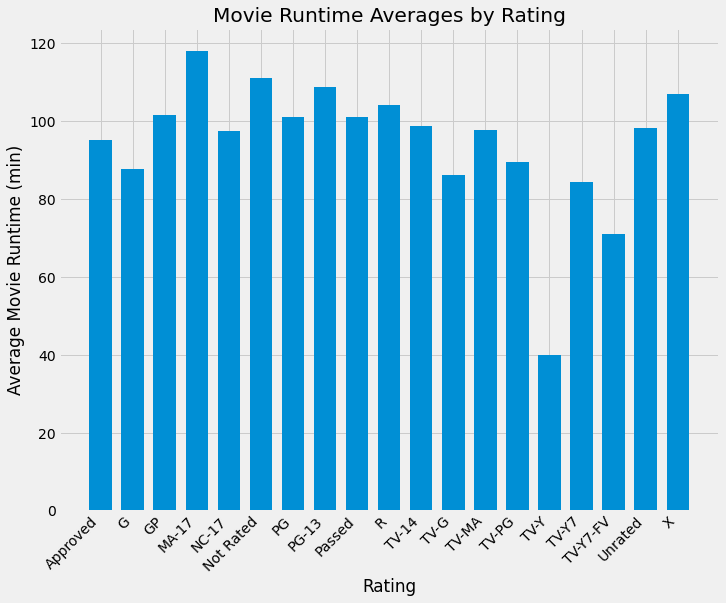

In [18]:
# runtime by platform charts
# Tell matplotlib that we will be making a bar chart
# average movie runtime is our y-axis and x-axis is ratings
# make a list of ratings
rating_list = rated_runtime["Rating"].tolist()
rating_list
x_axis_rating_list = np.arange(len(rating_list))
# Create ticks for our bar chart's x-values
tick_locations_ratings = [value for value in x_axis_rating_list]
plt.xticks(tick_locations_ratings, rating_list, rotation = 45, va = 'top', ha = 'right')
# plot bar chart
plt.bar(x_axis_rating_list, rated_runtime["Runtime"], align="center", width = 0.7)
#plt.rcParams["figure.figsize"] = (12, 6)
plt.tight_layout()
# Give our chart some labels and a tile
plt.title("Movie Runtime Averages by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Movie Runtime (min)")
plt.savefig("images/movie_runtime_averages_by_rating.png", bbox_inches="tight")

##### Average Movie Score by Platform

,Film rating system,Netflix,Prime Video,Hulu,Disney+
0,Metascore,58.542192,54.780773,58.691884,60.840000
1,Imdb,64.247960,62.454492,63.490820,65.556818
2,Rotten Tomatoes,64.818581,59.058720,64.955936,63.843182


Film rating system,Metascore,Imdb,Rotten Tomatoes
Netflix,58.542192,64.24796,64.818581
Prime Video,54.780773,62.454492,59.05872
Hulu,58.691884,63.49082,64.955936
Disney+,60.84,65.556818,63.843182


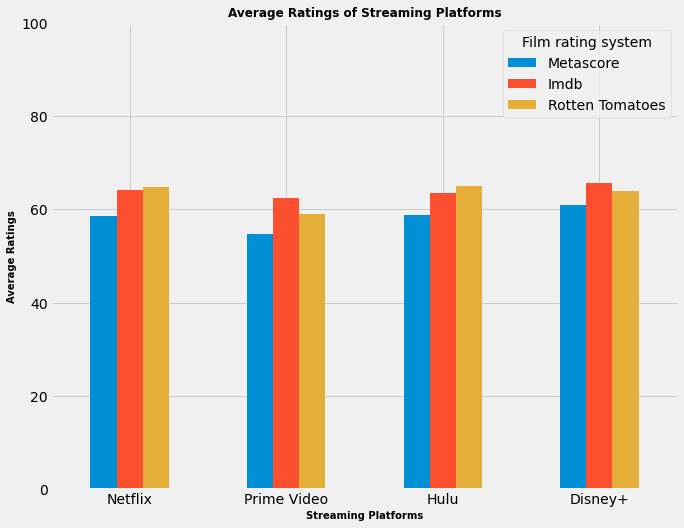

In [19]:
score=movie_data[['Year',"Netflix", "Prime Video", "Hulu", "Disney+",'Metascore','Imdb','Rotten Tomatoes']]
netflix_score=score[score['Netflix']>0]
netflix_score=netflix_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
netflix_scoredf=pd.DataFrame({'Film rating system':netflix_score['index'],'Netflix':netflix_score[0]})
netflix_scoredf

prime_score=score[score['Prime Video']>0]
prime_score=prime_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
prime_scoredf=pd.DataFrame({'Film rating system':prime_score['index'],'Prime Video':prime_score[0]})

hulu_score=score[score['Hulu']>0]
hulu_score=hulu_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
hulu_scoredf=pd.DataFrame({'Film rating system':hulu_score['index'],'Hulu':hulu_score[0]})

disney_score=score[score['Disney+']>0]
disney_score=disney_score.agg({'Metascore':'mean','Imdb':'mean','Rotten Tomatoes':'mean'}).reset_index()
disney_scoredf=pd.DataFrame({'Film rating system':disney_score['index'],'Disney+':disney_score[0]})

score_by_platform=pd.merge(netflix_scoredf,prime_scoredf,how='left',on='Film rating system')
score_by_platform=pd.merge(score_by_platform,hulu_scoredf,how='left',on='Film rating system')
score_by_platform=pd.merge(score_by_platform,disney_scoredf,how='left',on='Film rating system')
display(score_by_platform)

ratingpivot=pd.DataFrame(score_by_platform.transpose())
new_header = ratingpivot.iloc[0] #grab the first row for the header
ratingpivot = ratingpivot[1:] #take the data less the header row
ratingpivot.columns = new_header #set the header row as the df header
display(ratingpivot)

ratingpivot.plot.bar()
plt.xticks(rotation = 0)
plt.ylim((0, 100))
plt.xlabel("Streaming Platforms", fontweight='bold', fontsize=10)
plt.ylabel("Average Ratings", fontweight='bold', fontsize=10)
plt.title("Average Ratings of Streaming Platforms", fontweight='bold', fontsize=12)
plt.savefig("images/average_ratings_of_streaming_platforms.png", bbox_inches="tight")

#### Which factors (decade, movie length) impact the movie rating the most?
* Average Rating by Decade
* Average Rating by Runtime

##### Average Rating by Decade

In [20]:
#make a new data for scores only
score=movie_data[['Year',"Netflix", "Prime Video", "Hulu", "Disney+",'Metascore','Imdb','Rotten Tomatoes']]

#add average score to the data
cols=['Metascore','Imdb','Rotten Tomatoes']
score['Avg. score'] = round(score[cols].mean(axis=1))

scoreAvg=score[["Year","Netflix", "Prime Video", "Hulu", "Disney+","Avg. score"]]

netflix_scoreAvg=scoreAvg[scoreAvg['Netflix']>0]
netflix_scoreAvg=netflix_scoreAvg[['Year','Netflix','Avg. score']]

prime_scoreAvg=scoreAvg[scoreAvg['Prime Video']>0]
prime_scoreAvg=prime_scoreAvg[['Year','Prime Video','Avg. score']]

hulu__scoreAvg=scoreAvg[scoreAvg['Hulu']>0]
hulu__scoreAvg=hulu__scoreAvg[['Year','Hulu','Avg. score']]

disney__scoreAvg=scoreAvg[scoreAvg['Disney+']>0]
disney__scoreAvg=disney__scoreAvg[['Year','Disney+','Avg. score']]

#distribution by decade of Netflix streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]
netflix_scoreAvg['Decade']=pd.cut(netflix_scoreAvg['Year'],size_bins, labels=group_names, right=False)
netflix_scoreAvgdf=netflix_scoreAvg.groupby(["Decade"]).agg({"Netflix":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score":"Netflix Avg. score"})

#distribution by decade of Prime Video streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]
prime_scoreAvg['Decade']=pd.cut(prime_scoreAvg['Year'],size_bins, labels=group_names, right=False)
prime_scoreAvgdf=prime_scoreAvg.groupby(["Decade"]).agg({"Prime Video":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score":"Prime Video Avg. score"})

#distribution by decade of Hulu streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]
hulu__scoreAvg['Decade']=pd.cut(hulu__scoreAvg['Year'],size_bins, labels=group_names, right=False)
hulu__scoreAvgdf=hulu__scoreAvg.groupby(["Decade"]).agg({"Hulu":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score": "Hulu Avg. score"})

#distribution by decade of Disney+ streaming service
size_bins = [0, 1980, 1990, 2000, 2010, 2023]
group_names = ["Before 1980", "1980-1989", "1990-1999","2000-2009","2010-2022"]
disney__scoreAvg['Decade']=pd.cut(disney__scoreAvg['Year'],size_bins, labels=group_names, right=False)
disney__scoreAvgdf=disney__scoreAvg.groupby(["Decade"]).agg({"Disney+":"sum", "Avg. score":"mean"}).rename(columns={"Avg. score": "Disney+ Avg. score"})

#merge the avg. score for all platform
complete_scoreAvg1=pd.merge(netflix_scoreAvgdf,prime_scoreAvgdf, how="inner",on="Decade")
complete_scoreAvg2=pd.merge(hulu__scoreAvgdf,disney__scoreAvgdf, how="inner",on="Decade")
complete_scoreAvg=pd.merge(complete_scoreAvg1,complete_scoreAvg2, how="inner",on="Decade")
complete_scoreAvg=complete_scoreAvg[['Netflix Avg. score','Prime Video Avg. score','Hulu Avg. score','Disney+ Avg. score']]
complete_scoreAvg.round()

C:\Users\Stephen\AppData\Local\Temp\ipykernel_43904\3369915664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['Avg. score'] = round(score[cols].mean(axis=1))


,Netflix Avg. score,Prime Video Avg. score,Hulu Avg. score,Disney+ Avg. score
Decade,,,,
Before 1980,82.0,72.0,68.0,68.0
1980-1989,64.0,59.0,65.0,66.0
1990-1999,60.0,56.0,59.0,55.0
2000-2009,61.0,56.0,55.0,58.0
2010-2022,63.0,58.0,64.0,69.0


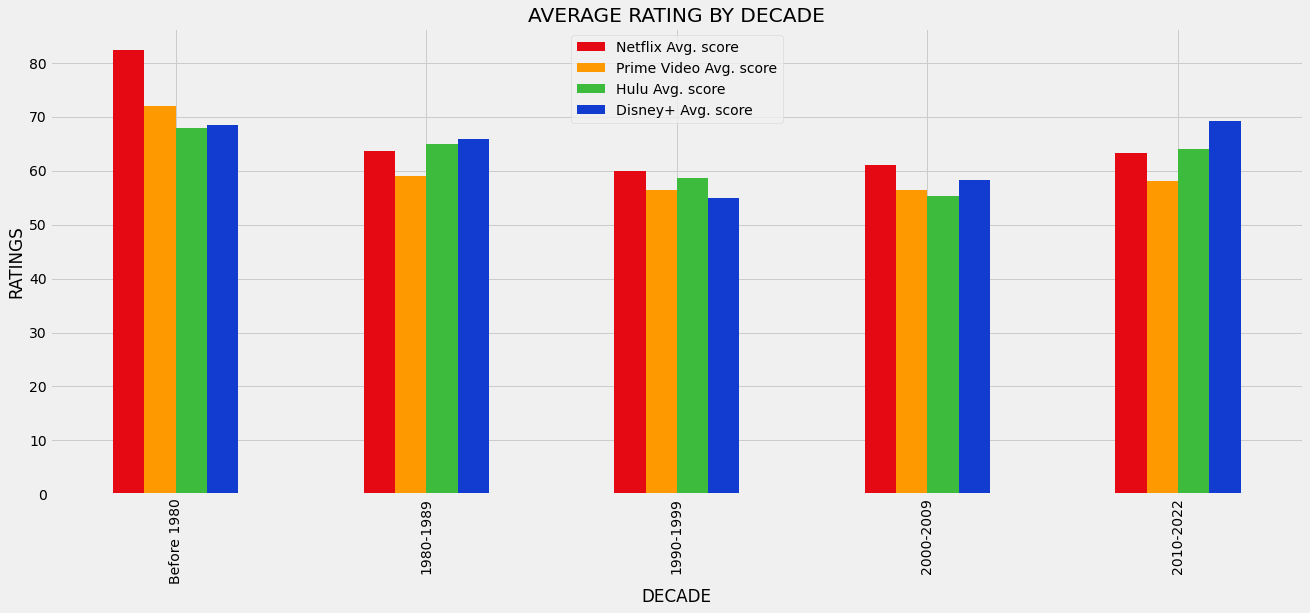

In [21]:
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# set axis
ax=complete_scoreAvg.plot.bar(figsize=(20,8), color=['#e50914', '#ff9900', '#3dbb3d', '#113ccf'])

# Add a title
ax.set_title("AVERAGE RATING BY DECADE")

#  Add a x- and y-axis label.
ax.set_xlabel("DECADE")
ax.set_ylabel("RATINGS")
plt.savefig("images/average_rating_by_decade.png", bbox_inches="tight")
plt.show()

##### Average Rating by Runtime

In [22]:
#create bins for time frame
size_bins = [0, 60, 120, 180, 240]
group_names = ["under 1 hour", "1 to 2 hour", "2 to 3 hour","3 to 4 hour"]
#new data frame for runtime
runtime= movie_data[['Runtime','Metascore','Imdb','Rotten Tomatoes']]
#add runtime summary column by time period
runtime['Runtime summary']=pd.cut(runtime['Runtime'],size_bins, labels=group_names, right=False)
#groupby runtime summary
runtimeAvg = runtime.groupby(["Runtime summary"]).mean()[["Metascore", "Imdb", "Rotten Tomatoes"]]
runtimeAvg

C:\Users\Stephen\AppData\Local\Temp\ipykernel_43904\1623309561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime['Runtime summary']=pd.cut(runtime['Runtime'],size_bins, labels=group_names, right=False)


,Metascore,Imdb,Rotten Tomatoes
Runtime summary,,,
under 1 hour,64.333333,65.843137,80.529412
1 to 2 hour,56.306760,62.461775,61.486049
2 to 3 hour,64.293139,68.236953,67.170663
3 to 4 hour,75.200000,75.500000,81.437500


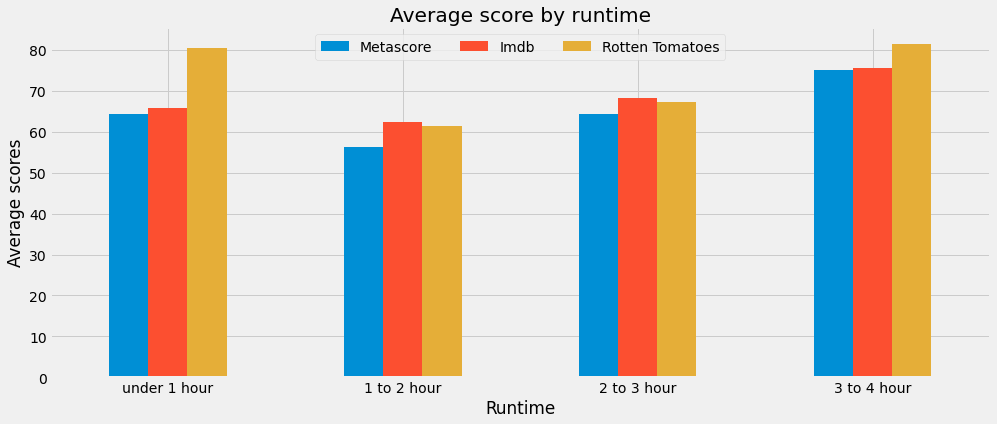

In [23]:
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax=runtimeAvg.plot(figsize=(15,6),kind="bar")
# Add a title
ax.set_title("Average score by runtime")
#  Add a x- and y-axis label.
ax.set_xlabel("Runtime")
ax.set_ylabel("Average scores")
plt.xticks(rotation=0)
plt. legend(loc='upper center', ncol=6)
plt.savefig("images/average_score_by_runtime.png", bbox_inches="tight")
plt.show()